In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
# Mount Google Drive and set data paths.
import os
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ML4H - Project 2

## Preprocessing

### General

In [3]:
# Gloabal variables
data_path = "/content/gdrive/My Drive/ETH/MLH/Project2/data/PubMed_200k_RCT/"

seed = 50

In [4]:
import pickle
import numpy as np
import string

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords

import seaborn as sns

from tqdm.notebook import tqdm

import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading files

In [5]:
with open(data_path + 'train.txt') as f:
    train = f.readlines()

with open(data_path + 'test.txt') as f:
    test = f.readlines()

with open(data_path + 'dev.txt') as f:
    dev = f.readlines()

print("Train has size: {}".format(len(train)))
print("Test has size: {}".format(len(test)))
print("Dev has size: {}".format(len(dev)))

Train has size: 2593169
Test has size: 34493
Dev has size: 33932


In [6]:
# Removing ID and empty lines
train = list(filter(lambda x: not x.startswith(('###', '\n')), tqdm(train)))
test = list(filter(lambda x: not x.startswith(('###', '\n')), tqdm(test)))
dev = list(filter(lambda x: not x.startswith(('###', '\n')), tqdm(dev)))

  0%|          | 0/2593169 [00:00<?, ?it/s]

  0%|          | 0/34493 [00:00<?, ?it/s]

  0%|          | 0/33932 [00:00<?, ?it/s]

In [7]:
# Building list of lists (and separating first word)
train = list(map(lambda x:x.split('\t', 1), tqdm(train)))
test = list(map(lambda x:x.split('\t', 1), tqdm(test)))
dev = list(map(lambda x:x.split('\t', 1), tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [8]:
print(train[0])

['BACKGROUND', 'The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n']


In [9]:
# Lowercasing sentence
train = list(map(lambda x:[x[0], x[1].lower()], tqdm(train)))
test = list(map(lambda x:[x[0], x[1].lower()], tqdm(test)))
dev = list(map(lambda x:[x[0], x[1].lower()], tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [10]:
print(train[0])

['BACKGROUND', 'the emergence of hiv as a chronic condition means that people living with hiv are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n']


In [11]:
# Tokenizing sentence
tokenizer = RegexpTokenizer(r'\w+')

train = list(map(lambda x:[x[0], tokenizer.tokenize(x[1])], tqdm(train)))
test = list(map(lambda x:[x[0], tokenizer.tokenize(x[1])], tqdm(test)))
dev = list(map(lambda x:[x[0], tokenizer.tokenize(x[1])], tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [12]:
print(train[0])

['BACKGROUND', ['the', 'emergence', 'of', 'hiv', 'as', 'a', 'chronic', 'condition', 'means', 'that', 'people', 'living', 'with', 'hiv', 'are', 'required', 'to', 'take', 'more', 'responsibility', 'for', 'the', 'self', 'management', 'of', 'their', 'condition', 'including', 'making', 'physical', 'emotional', 'and', 'social', 'adjustments']]


In [13]:
# Removing stopwords
stopwords_set = stopwords.words('english')

train = list(map(lambda x:[x[0], [w for w in x[1] if not w in stopwords_set]], tqdm(train)))
test = list(map(lambda x:[x[0], [w for w in x[1] if not w in stopwords_set]], tqdm(test)))
dev = list(map(lambda x:[x[0], [w for w in x[1] if not w in stopwords_set]], tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [14]:
print(train[0])

['BACKGROUND', ['emergence', 'hiv', 'chronic', 'condition', 'means', 'people', 'living', 'hiv', 'required', 'take', 'responsibility', 'self', 'management', 'condition', 'including', 'making', 'physical', 'emotional', 'social', 'adjustments']]


In [15]:
# Stemming
stemmer = PorterStemmer()

train = list(map(lambda x:[x[0], [stemmer.stem(w) for w in x[1]]], tqdm(train)))
test = list(map(lambda x:[x[0], [stemmer.stem(w) for w in x[1]]], tqdm(test)))
dev = list(map(lambda x:[x[0], [stemmer.stem(w) for w in x[1]]], tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [16]:
print(train[0])

['BACKGROUND', ['emerg', 'hiv', 'chronic', 'condit', 'mean', 'peopl', 'live', 'hiv', 'requir', 'take', 'respons', 'self', 'manag', 'condit', 'includ', 'make', 'physic', 'emot', 'social', 'adjust']]


In [17]:
# Lemmatizing
lemmatizer = WordNetLemmatizer()

train = list(map(lambda x:[x[0], [lemmatizer.lemmatize(w) for w in x[1]]], tqdm(train)))
test = list(map(lambda x:[x[0], [lemmatizer.lemmatize(w) for w in x[1]]], tqdm(test)))
dev = list(map(lambda x:[x[0], [lemmatizer.lemmatize(w) for w in x[1]]], tqdm(dev)))

  0%|          | 0/2211861 [00:00<?, ?it/s]

  0%|          | 0/29493 [00:00<?, ?it/s]

  0%|          | 0/28932 [00:00<?, ?it/s]

In [18]:
print(train[0])

['BACKGROUND', ['emerg', 'hiv', 'chronic', 'condit', 'mean', 'peopl', 'live', 'hiv', 'requir', 'take', 'respons', 'self', 'manag', 'condit', 'includ', 'make', 'physic', 'emot', 'social', 'adjust']]


In [19]:
# N Grams
N = 1

if N > 1:
  train = list(map(lambda x:[x[0], train + [ ' '.join(grams) for grams in ngrams(x[1], N)]], tqdm(train)))
  test = list(map(lambda x:[x[0], test + [ ' '.join(grams) for grams in ngrams(x[1], N)]], tqdm(test)))
  dev = list(map(lambda x:[x[0], dev + [ ' '.join(grams) for grams in ngrams(x[1], N)]], tqdm(dev)))

In [20]:
print(train[0])

['BACKGROUND', ['emerg', 'hiv', 'chronic', 'condit', 'mean', 'peopl', 'live', 'hiv', 'requir', 'take', 'respons', 'self', 'manag', 'condit', 'includ', 'make', 'physic', 'emot', 'social', 'adjust']]


In [21]:
train_df = pd.DataFrame(train, columns=['Label', 'Words'])
test_df = pd.DataFrame(test, columns=['Label', 'Words'])
dev_df = pd.DataFrame(dev, columns=['Label', 'Words'])

In [22]:
train_df.head(5)

,Label,Words
0,BACKGROUND,"[emerg, hiv, chronic, condit, mean, peopl, liv..."
1,BACKGROUND,"[paper, describ, design, evalu, posit, outlook..."
2,METHODS,"[studi, design, randomis, control, trial, men,..."
3,METHODS,"[intervent, group, particip, onlin, group, pro..."
4,METHODS,"[program, base, self, efficaci, theori, use, s..."


In [23]:
# Save pre processed
train_df.to_parquet(data_path + 'pre_processed_train.gzip', compression='gzip')
test_df.to_parquet(data_path + 'pre_processed_test.gzip', compression='gzip')
dev_df.to_parquet(data_path + 'pre_processed_dev.gzip', compression='gzip')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Abstract Length Distribution')

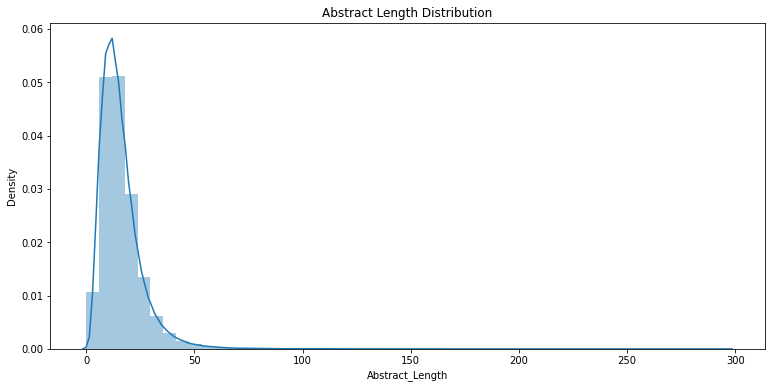

In [24]:
train_df['Abstract_Length'] = train_df['Words'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(train_df['Abstract_Length']).set_title('Abstract Length Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Abstract Length Distribution (trimmed @ 95th percentile)')

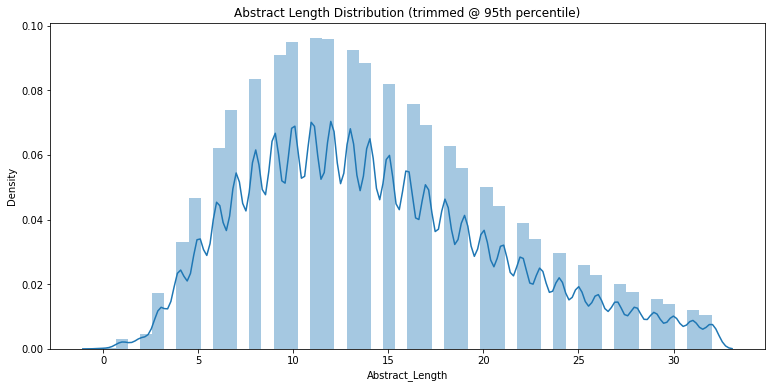

In [25]:
quantile_95 = train_df['Abstract_Length'].quantile(0.95)
df_95 = train_df[train_df['Abstract_Length'] < quantile_95]

plt.figure(figsize=(12.8,6))
sns.distplot(df_95['Abstract_Length']).set_title('Abstract Length Distribution (trimmed @ 95th percentile)')

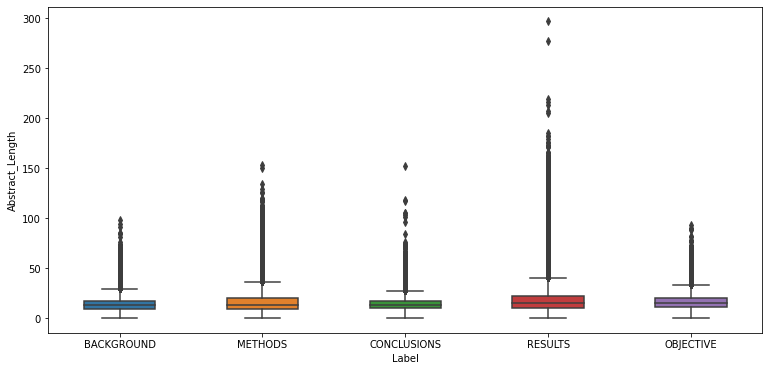

In [26]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=train_df, x='Label', y='Abstract_Length', width=.5)

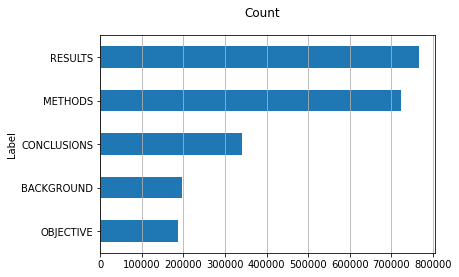

In [28]:
fig, ax = plt.subplots()
fig.suptitle("Count", fontsize=12)
train_df["Label"].reset_index().groupby("Label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [29]:
train_df['Abstract_Length'].describe()

count    2.211861e+06
mean     1.584905e+01
std      9.549608e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      2.000000e+01
max      2.970000e+02
Name: Abstract_Length, dtype: float64